# Traçando um perfil musical: analisando dados do Spotify

O Spotify é um provedor sueco de serviços de streaming de áudio e mídia, fundado em 23 de abril de 2006. A proposta é ser uma aplicação onde usuários possam criar perfis públicos, privados ou em conjunto, com suas músicas, artistas, álbuns e podcasts favoritos.

Nesse notebook, analisei dados extraídos da conta de uma usuária do Spotify para entender **o seu perfil musical** e **gostos pessoais**.

**Datasets utilizados:**
- `playlists_tracks`: contém a listagem de todas as suas playlists públicas e as músicas contidas nelas.
- `genre_artists`: contém os artistas presentes nas playlists e os seus respectivos gêneros.

##### **As colunas são**:

- `playlist_name` -  nome da playlist anonimizado
- `track_id` -  identificador da faixa
- `track_name` -  nome da faixa
- `artist_names` -  nome do artista
- `album_name` -  nome do álbum
- `album_release_date` -  data de lançamento do álbum
- `popularity` -  popularidade da faixa
- `duration_ms` -  duração da faixa em milissegundos

### 1. Pré-processamento

Importação de bibliotecas e carregamentos dos dados

In [770]:
import pandas as pd
import matplotlib.pyplot as plt

In [771]:
# Leitura dos datasets
playlist_tracks = pd.read_csv('playlists_tracks.csv')
genres_artists = pd.read_csv('genres_artists.csv')

In [772]:
# Cria uma cópia do dataset original
df_anonymous = playlist_tracks.copy()

df_anonymous["playlist_name"] = df_anonymous["playlist_name"].str.strip()

# Atribui aos nomes originais na coluna 'playlist_name' um novo nome
playlist_change = {}
for i, name in enumerate(df_anonymous["playlist_name"].unique()):
    playlist_change[name] = f"Playlist_{i+1:02d}"

In [773]:
# Substitui os nomes antigos na coluna 'playlist_name' pelos novos
df_anonymous["playlist_name"] = df_anonymous["playlist_name"].map(playlist_change)

# Exclui a coluna 'playlist_id'
df_anonymous = df_anonymous.drop(columns=["playlist_id"])

df_anonymous.head(3)

,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms
0,Playlist_01,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573
1,Playlist_01,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240
2,Playlist_01,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560


In [774]:
# Visão geral dos dados presentes no dataset 'df_anonymous'
df_anonymous.shape

(8661, 8)

In [775]:
df_anonymous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8661 entries, 0 to 8679
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   playlist_name       8661 non-null   object
 1   track_id            8661 non-null   object
 2   track_name          8659 non-null   object
 3   artist_names        8659 non-null   object
 4   album_name          8659 non-null   object
 5   album_release_date  8661 non-null   object
 6   popularity          8661 non-null   int64 
 7   duration_ms         8661 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 609.0+ KB


Existem **8661** entradas e **8659** `track_name`s não nulos. Irei excluir essas faixas ausentes, pois são irrelevantes para os propósitos dessa análise.

In [776]:
# Visão geral dos dados presentes no dataset 'genres_artists'
genres_artists.shape

(934, 2)

In [777]:
genres_artists.head(5)

,artist_name,genres
0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,The Hives,garage rock


In [778]:
# Exibindo um resumo dos dados
genres_artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 0 to 933
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  934 non-null    object
 1   genres       660 non-null    object
dtypes: object(2)
memory usage: 21.9+ KB


O dataset `genre_artists` possui, na coluna `genres`, muitos valores separados por vírgula e **660** valores não nulos. Para fins dessa análise, irei excluir valores nulos e formatar essa coluna para que cada linha possua somente um gênero.


### 2. Limpeza e Tranformações

Antes de analizar as playlists e os gêneros, é necessário preparar os dados.
As etapas abaixo mostram o processo de tratamento e padronização das informações.

####  2.1 Extraindo valores nulos de `track_name`.

In [779]:
# Remove valores nulos da coluna 'track_name'
df_anonymous = df_anonymous.dropna(subset=['track_name'])
df_anonymous.shape

(8659, 8)

#### 2.2 Extração e Conversão de Datas

In [780]:
# Converte o dado para datetime e extrai somente o ano.
# Aplica também o errors='coerce', pois caso haja um valor que não possa ser interpretado como data/hora, a função o substituirá por NaT (Not a Time).

df_anonymous['album_release_date_ajustado'] = pd.to_datetime(df_anonymous['album_release_date'], errors='coerce')

In [781]:
df_anonymous.columns

Index(['playlist_name', 'track_id', 'track_name', 'artist_names', 'album_name',
       'album_release_date', 'popularity', 'duration_ms',
       'album_release_date_ajustado'],
      dtype='object')

In [782]:
df_anonymous.head()

,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_date_ajustado
0,Playlist_01,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01
1,Playlist_01,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,NaT
2,Playlist_01,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,NaT
3,Playlist_01,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906,NaT
4,Playlist_01,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866,NaT


In [783]:
# Verifica informações da coluna 'album_release_year'
df_anonymous['album_release_date_ajustado'].info()

<class 'pandas.core.series.Series'>
Index: 8659 entries, 0 to 8679
Series name: album_release_date_ajustado
Non-Null Count  Dtype         
--------------  -----         
629 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.3 KB


In [784]:
# Exibe uma amostra dos dados que foram considerados nulos após a conversão para datetime.
invalid_dates = df_anonymous[pd.to_datetime(df_anonymous['album_release_date'], errors='coerce').isna()]
invalid_dates['album_release_date'].unique()[:30]

array(['2001-09-04', '2021-09-10', '2005-11-22', '1987-06-15',
       '1999-11-02', '2004-01-01', '2002-01-01', '1970-09-18',
       '1979-07-27', '1990-08-01', '1996-04-16', '2007-05-14',
       '1980-09-20', '1997-09-29', '2007-01-01', '2000-09-12',
       '1980-09-01', '1972-09-25', '1973-03-01', '1979-11-30',
       '1995-10-02', '1994-08-29', '2002-02-03', '1997-08-21',
       '2025-03-10', '2024-11-26', '2019-10-11', '2023-04-07',
       '2021-02-26', '2023-06-30'], dtype=object)

Após a criação da coluna `album_release_date_ajustado` (convertida para datetime) notei que apenas **629 linhas** apresentavam valores não nulos, ou seja, aproximadamente **7% dos valores originais**.

Ao verificar uma amostra de 30 valores classificados como nulos, percebi que **muitos eram válidos**, mas não foram reconhecidos pelo `pd.to_datetime()`. Além disso, observei que o primeiro valor não nulo correspondia ao ano **1992**, sugerindo que apenas datas contendo **somente o ano** foram corretamente convertidas, enquanto formatos completos (`YYYY-MM-DD`) foram ignorados.

Essa análise levou à criação da função `clean_date()`, que trata os diferentes formatos de data ('YYYY' e 'YYYY-MM-DD').


In [785]:

def clean_date(df, col):
    """
    Limpa e padroniza uma coluna de datas em um dataframe do Pandas.

    Esta função tenta converter os valores de uma coluna de datas que podem estar em
    diferentes formatos ('YYYY-MM-DD' e 'YYYY') para o tipo datetime.

    Parâmetros:
    df : pandas.DataFrame
        O DataFrame que contém a coluna de datas.
    col : str
        O nome da coluna que será limpa e convertida.

    Retorna:
    pandas.DataFrame
        Uma cópia do datafrane original com novas colunas:
        - data_completa: datas convertidas no formato completo (YYYY-MM-DD)
        - data_ano: datas convertidas quando há apenas o ano (YYYY)
        - data_final: combinação das duas conversões anteriores
    """
     # Copia o dataframe para não alterar o original
    df = df.copy()

    # Garante que todos os valores são strings
    df[col] = df[col].astype(str)

    # Remove espaços brancos extras
    df[col] = df[col].str.strip()

    # Tenta converter datas completas (YYYY-MM-DD)
    df['data_completa'] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')

    # Tenta converter datas que contêm apenas o ano 'YYYY'
    df['data_ano'] = pd.to_datetime(df[col], format='%Y', errors='coerce')

    # Combina os dois resultados e mantém a data válida que existir em cada linha
    df['data_final'] = df['data_completa'].combine_first(df['data_ano'])

    return df


In [786]:
df_anonymous_clean = clean_date(df_anonymous, 'album_release_date')

# Extrai o ano de lançamento da data final
df_anonymous_clean['album_release_year'] = df_anonymous_clean['data_final'].dt.year.astype('Int64')

# Remove colunas temporárias
df_anonymous_clean = df_anonymous_clean.drop(columns=['album_release_date_ajustado', 'data_completa', 'data_ano', 'data_final'])

df_anonymous_clean.head()

,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_year
0,Playlist_01,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992
1,Playlist_01,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,2001
2,Playlist_01,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,2021
3,Playlist_01,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906,2005
4,Playlist_01,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866,1987


In [787]:
# Verifica o número de valores não nulos na coluna 'album_release_year' após a função 'clean_date'
df_anonymous_clean['album_release_year'].info()

<class 'pandas.core.series.Series'>
Index: 8659 entries, 0 to 8679
Series name: album_release_year
Non-Null Count  Dtype
--------------  -----
8650 non-null   Int64
dtypes: Int64(1)
memory usage: 143.8 KB


In [788]:
# Exibe os valores que não foram convertidos e são considerados nulos em 'album_release_year'
df_anonymous_clean.loc[df_anonymous_clean['album_release_year'].isna(), 'album_release_date']

829     1970-09
2148    1960-02
2405    1957-03
3084    1970-09
3380    1960-02
3393    1965-03
3424    1960-02
4509    1965-06
6205    1965-06
Name: album_release_date, dtype: object

Após aplicar a função `clean_date`, percebi que ainda restavam 9 valores nulos. Ao investigar, notei que esses casos correspondiam a datas no formato YYYY-MM (ano e mês) que não foram formatadas com a função.

> A função poderia ter sido atualizada para incluir esse novo formato, mas para fins **estudo** sobre novas possibilidades de resolver esse problema, uma forma alternativa foi criada para tratar esses valores isoladamente.

In [789]:
# Cria uma série com as linhas que contém o formato 'Y-MM'
y_m_release_date_format = df_anonymous_clean['album_release_date'].str.match(r'^\d{4}-\d{2}$')

# Cria uma col com valores nulos
df_anonymous_clean['album_release_year_y_m'] = pd.NA

# Adiciona o ano de lançamento do álbum à coluna 'album_release_year_y_m'
df_anonymous_clean.loc[y_m_release_date_format, 'album_release_year_y_m'] = (pd.to_datetime(df_anonymous_clean.loc[y_m_release_date_format, 'album_release_date'], format='%Y-%m', errors='coerce').dt.year.astype('Int64'))

# Combina os valores de 'album_release_year' com 'album_release_year_y_m' e mantém na coluna 'album_release_year' o que nao for nulo
df_anonymous_clean['album_release_year'] = df_anonymous_clean['album_release_year_y_m'].combine_first(df_anonymous_clean['album_release_year'])

df_anonymous_clean['album_release_year'].info()


<class 'pandas.core.series.Series'>
Index: 8659 entries, 0 to 8679
Series name: album_release_year
Non-Null Count  Dtype 
--------------  ----- 
8659 non-null   object
dtypes: object(1)
memory usage: 393.3+ KB


Como alternativa a modificar a função original para incluir o formato “YYYY-MM”, optei por criar um tratamento à parte para esses casos. Primeiro, filtrei as linhas da coluna album_release_date que estavam nesse formato específico. Depois, criei uma coluna preenchida com valores nulos para servir de placeholder.

Usando .loc, converti apenas essas datas para o tipo datetime com o formato "ano-mês" e extraí somente o ano, preenchendo o placeholder nos índices correspondentes. Depois, utilizei o método combine_first para combinar essa nova coluna com a coluna original album_release_year, substituindo apenas os valores ausentes.

Essa abordagem foi adotada para explorar outra forma de resolver o problema sem alterar a função anterior, mais por curiosidade e aprendizado, já que este notebook faz parte de um exercício.

In [790]:
# Transforma a coluna 'album_release_year' em int novamente
df_anonymous_clean['album_release_year'] = df_anonymous_clean['album_release_year'].astype('Int64')

df_anonymous_clean['album_release_year'].info()

<class 'pandas.core.series.Series'>
Index: 8659 entries, 0 to 8679
Series name: album_release_year
Non-Null Count  Dtype
--------------  -----
8659 non-null   Int64
dtypes: Int64(1)
memory usage: 401.8 KB


Transformei a coluna `album_release_year` em inteiro novamente.

In [791]:
# Exclui a coluna temporária 'album_release_year_y_m'
df_anonymous_clean = df_anonymous_clean.drop(columns=['album_release_year_y_m'])

df_anonymous_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8659 entries, 0 to 8679
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   playlist_name       8659 non-null   object
 1   track_id            8659 non-null   object
 2   track_name          8659 non-null   object
 3   artist_names        8659 non-null   object
 4   album_name          8659 non-null   object
 5   album_release_date  8659 non-null   object
 6   popularity          8659 non-null   int64 
 7   duration_ms         8659 non-null   int64 
 8   album_release_year  8659 non-null   Int64 
dtypes: Int64(1), int64(2), object(6)
memory usage: 943.0+ KB


#### 2.4 Explosão de gêneros

Os dados de gênero presentes no dataset `genre_artists` possuem vários gêneros associados a um mesmo artista, por exemplo:
`System of a Down → ['nu metal', 'alternative metal', 'rap metal'...]`

Para tornar a base mais **granular** e **facilitar análises posteriores**, como a identificação de quantos gêneros únicos estão representados na playlist, é importante que **cada linha represente apenas um gênero por artista**.

Criarei a função `clean_explode` para limpar, padronizar e explodir esses dados.


In [792]:
# Estrutura do dataset 'genres_artists' antes da função.
genres_artists.head()

,artist_name,genres
0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,The Hives,garage rock


In [793]:
def clean_explode(df, col):
    """
    Limpa, padroniza e explode valores de uma coluna em um dataframe do Pandas.

    Esta função trata colunas que possuem muitos valores armazenados como texto numa única célula, transformando cada valor numa célula separada, deixando o conjunto de dados no formato 'longo'.

    Parâmetros:
    df : pandas.DataFrame
        O DataFrame que contém a coluna a ser tratada.
    col : str
        O nome da coluna cujos valores serão separados.

    Retorna:
    pandas.DataFrame
        Uma cópia do dataframe original, com:
        - uma coluna de nome 'lista' contendo os valores separados.

    """
    # Copia o dataframe para não alterar o original
    df = df.copy()

    # Transforma a string em lista para separar os gêneros pela vírgula
    df['lista'] = df[col].fillna("").str.split(',')

    # Transforma a coluna com uma lista de gênero por uma que possui um gênero por linha
    df = df.explode('lista')

    # Retira possíveis espaços presentes nos valores para não haver nenhum gênero igual sendo considerado como diferente por possuir espaço
    df["lista"] = df["lista"].str.strip()

    # Remove possíveis linhas vazias
    df = df[df['lista'] != ""]

    return df

In [794]:
# Cria um dataframe com os valores da coluna 'genres' separados
genres_artists_clean = clean_explode(genres_artists, 'genres')

# Renomeia a coluna lista para genre
genres_artists_clean = genres_artists_clean.rename(columns={'lista': 'genre'})

# Remove a coluna original 'genres'
genres_artists_clean = genres_artists_clean.drop(columns=['genres'])

Criei um dataset, apliquei a função, renomeei a coluna `lista` para `genre` e excluí a coluna irrelevante que continha os gêneros agrupados.

In [795]:
# Estrutura do dataset 'genres_artists' depois da função.
genres_artists_clean.head()

,artist_name,genre
0,Rage Against The Machine,rap metal
0,Rage Against The Machine,rap rock
0,Rage Against The Machine,alternative metal
0,Rage Against The Machine,nu metal
1,System Of A Down,nu metal


A coluna de gêneros agora possui um valor por linha.

In [796]:
genres_artists_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1515 entries, 0 to 933
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  1515 non-null   object
 1   genre        1515 non-null   object
dtypes: object(2)
memory usage: 35.5+ KB


## Análise Exploratória dos Dados

Irei analisar quantas playlists existem e qual a quantidade média de músicas elas possuem.

In [797]:
# Exibe a quantidade de playlists presentes no dataset
df_anonymous_clean.playlist_name.nunique()

89

In [798]:
# Exibe a média de músicas por playlist
df_anonymous_clean['playlist_name'].value_counts().mean()

np.float64(97.29213483146067)

O conjunto de dados possui **89 playlists**, e tem uma média de **97 músicas** por lista. Isso demonstra que a usuária possui um comportamento altamente ativo na plataforma, sugerindo não apensas uso frequente, mas também um envolvimento curatorial.


Irei observar as playlists mais populares, criando um **top 10 playlists com mais músicas**.

In [799]:
# Exibe o nome da playlist e a contagem de música que cada uma possui
playlist_counts = df_anonymous_clean['playlist_name'].value_counts().head(10)
playlist_counts

playlist_name
Playlist_43    311
Playlist_78    300
Playlist_74    274
Playlist_55    261
Playlist_52    241
Playlist_83    239
Playlist_56    231
Playlist_67    219
Playlist_41    215
Playlist_79    210
Name: count, dtype: int64

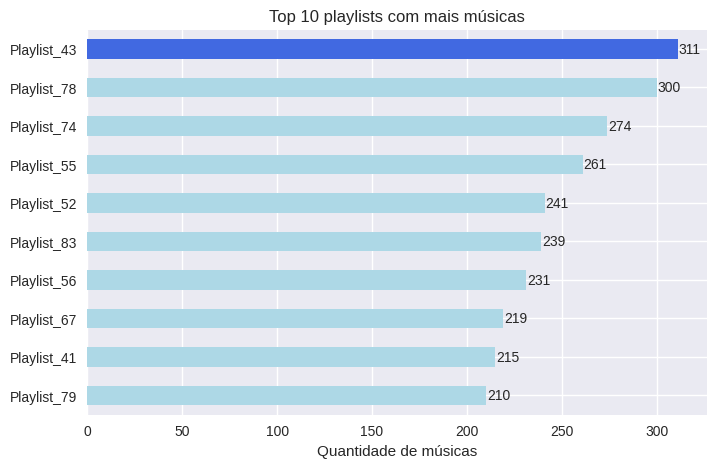

In [800]:
# Inverte a ordem de exibição das playlists para deixar a que possui mais músicas no topo
playlist_counts = playlist_counts.sort_values(ascending=True)

colors = ['lightblue' if i < playlist_counts.max() else 'royalblue' for i in playlist_counts]

# Exibe um gráfico de barras horizontais
playlist_counts.plot(kind='barh', color=colors, figsize=(8,5))
plt.title('Top 10 playlists com mais músicas')
plt.xlabel('Quantidade de músicas')
plt.ylabel("")

# Mostra o valor exato das músicas por playlist
for i, v in enumerate(playlist_counts):
    plt.text(v + 0.5, i, str(v), va="center")


A playlist com mais músicas adicionadas é a **Playlist_43** com 311 faixas, seguida por **Playlist_78** com 300 e
**Playlist_74** com 274 músicas. Isso indica que a usuária, além de ativa na plataforma, tem preferência por criar playlists temáticas.

#### Evolução das músicas por ano de lançamento.

In [801]:
plt.style.use('seaborn-v0_8')

In [802]:
# Exibe a quantidade de músicas lançadas por ano
songs_per_year = df_anonymous_clean['album_release_year'].value_counts().sort_index()
songs_per_year

album_release_year
1957      6
1958      1
1960      7
1961      1
1963      9
       ... 
2021    359
2022    168
2023    110
2024     51
2025     46
Name: count, Length: 67, dtype: Int64

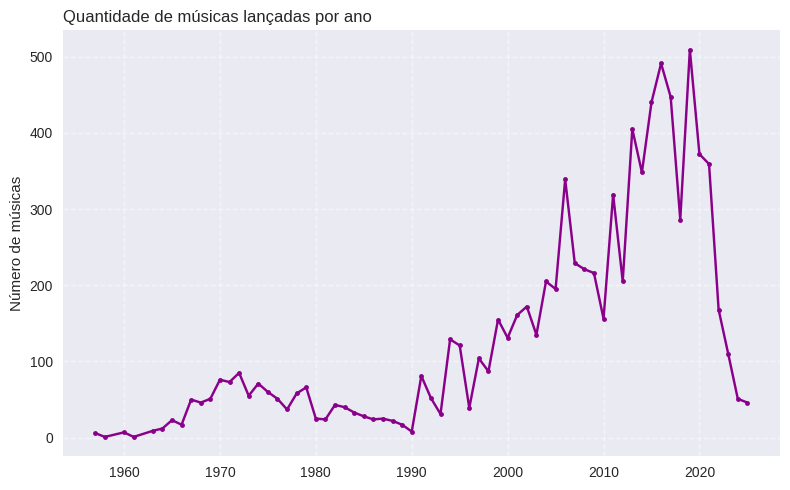

In [803]:
# Cria um gráfico de linhas
songs_per_year.plot(kind='line', marker=".", color='darkmagenta', figsize=(8,5))

plt.title('Quantidade de músicas lançadas por ano', loc='left')
plt.xlabel("")
plt.ylabel("Número de músicas")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


Observei que, a partir da década de 1990, a frequência de música cresce de forma expressiva, com destaque para vários picos entre 2000 e 2020, período que concentra a maior parte das faixas. Isso pode refletir uma preferência pessoal por músicas mais recentes ou uma predominância de lançamentos contemporâneos disponíveis no Spotify.

Irei observar se esse comportamento se mantém entre as **dez playlists com maior números de faixas**.

Text(0, 0.5, 'Número de Músicas')

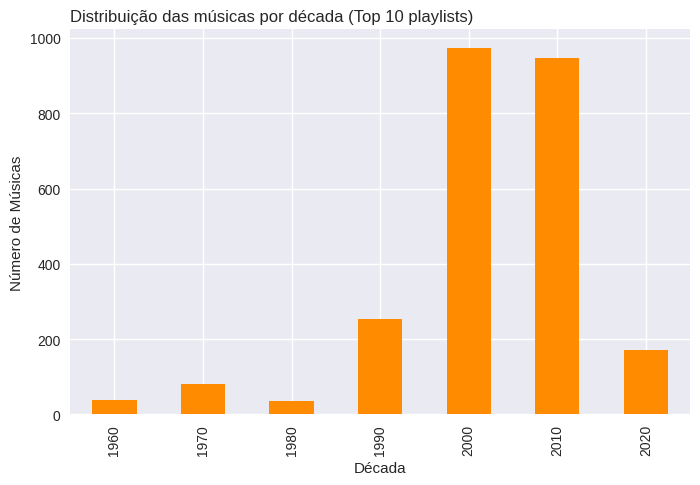

In [804]:
# Cria uma cópia do dataframe limpo somente com as playlists que fazem parte do top 10
df_top_10 = df_anonymous_clean[df_anonymous_clean['playlist_name'].isin(playlist_counts.index)].copy()

# Cria uma coluna para conter as décadas
df_top_10['decade'] = (df_top_10['album_release_year'] // 10) * 10
decade = df_top_10['decade'].value_counts().sort_index()

# Exibe um gráfico de barras verticais
decade.plot(kind='bar', color='darkorange', figsize=(8,5))
plt.title('Distribuição das músicas por década (Top 10 playlists)', loc='left')
plt.xlabel('Década')
plt.ylabel('Número de Músicas')

De modo geral, observa-se uma predominância de faixas lançadas nas décadas de 2000 e 2010, indicando que a usuária tende a incluir com mais frequência músicas lançadas nesse período.

#### Quais artistas possuem maior popularidade média

In [805]:
# Agrupa os artistas e calcula a média da popularidade para cada um
artists_popularity = df_anonymous_clean.groupby('artist_names')['popularity'].mean()

# Ordena a popularidade de forma decrescente
artists_popularity = artists_popularity.sort_values(ascending=False).head(10)
artists_popularity

artist_names
The Neighbourhood                 91.000000
Gorillaz, De La Soul              90.000000
Tyler, The Creator, Kali Uchis    89.000000
Fleetwood Mac                     89.000000
The Weeknd, Daft Punk             89.000000
Kendrick Lamar, SZA               89.000000
Bad Bunny                         88.333333
sombr                             88.000000
DJ Snake, Justin Bieber           86.000000
The Chainsmokers, Halsey          86.000000
Name: popularity, dtype: float64

Nessa etapa, analisei os artistas com maior popularidade média no dataset. Embora essa métrica seja calculada individualmente para cada **faixa**, levando em consideração a quantidade de vezes que a música foi ouvida e o quão recente essas faixas foram tocadas, ela também é influenciada por fatores relacionados à visibilidade do artista, como número de ouvintes e o alcance das suas músicas. Assim, essa análise de popularidade pode ser interpretada como um reflexo da relevância do artista dentro e fora da plataforma.

Segundo a documentação do Spotify para Desenvolvedores, a popularidade recebe um valor de **0 a 100**, sendo 100 a mais popular.

Fonte: 'https://developer.spotify.com/documentation/web-api/reference/get-an-artists-top-tracks'

Observei que, algumas linhas da coluna `artist_names` possuem mais de um artista, isso indica **faixas de colaboração**. Mas para fins dessa análise, irei separar esses artistas para descobrir a popularidade média de cada artista individualmente, visto que uma colaboração pode influenciar essa métrica.

In [806]:
# Limpa, padroniza e separa o nome dos artistas retornando uma nova coluna no dataset
df_anonymous_clean = clean_explode(df_anonymous_clean, 'artist_names')

# Renomeia a coluna criada pela função
df_anonymous_clean = df_anonymous_clean.rename(columns={'lista': 'artist_names_exploded'})

df_anonymous_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10143 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   playlist_name          10143 non-null  object
 1   track_id               10143 non-null  object
 2   track_name             10143 non-null  object
 3   artist_names           10143 non-null  object
 4   album_name             10143 non-null  object
 5   album_release_date     10143 non-null  object
 6   popularity             10143 non-null  int64 
 7   duration_ms            10143 non-null  int64 
 8   album_release_year     10143 non-null  Int64 
 9   artist_names_exploded  10143 non-null  object
dtypes: Int64(1), int64(2), object(7)
memory usage: 881.6+ KB


In [807]:
# Agrupa os artistas e calcula a média da popularidade para cada um individualmente
artists_exploded_popularity = df_anonymous_clean.groupby('artist_names_exploded')['popularity'].mean()

# Ordena a popularidade de forma decrescente
artists_exploded_popularity = artists_exploded_popularity.sort_values(ascending=False).head(10)
artists_exploded_popularity

artist_names_exploded
The Neighbourhood    91.000000
Fleetwood Mac        89.000000
Bad Bunny            88.333333
sombr                88.000000
a-ha                 86.000000
Nickelback           85.000000
Lil Jon              85.000000
The Cranberries      85.000000
AC/DC                84.750000
Doja Cat             84.000000
Name: popularity, dtype: float64

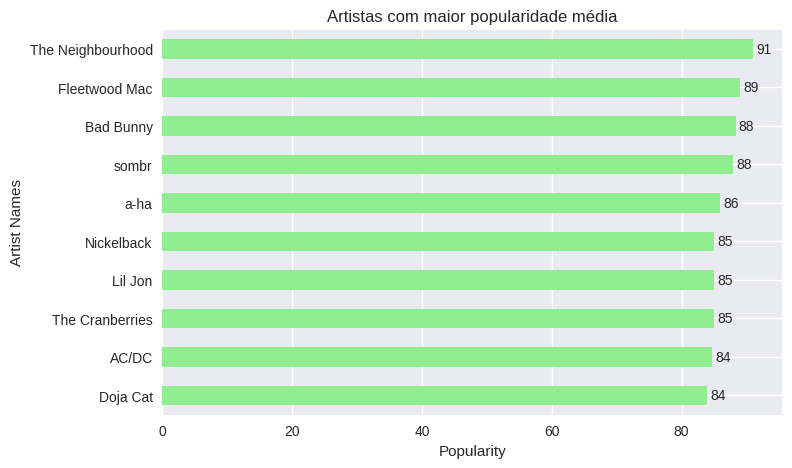

In [808]:
# Ordena os valores de forma decrescente
artists_exploded_popularity = artists_exploded_popularity.iloc[::-1]

# Cria um gráfico de barras para mostrar os artistas com maior popularidade média
artists_exploded_popularity.plot(kind='barh', color='lightgreen', figsize=(8,5))
plt.title('Artistas com maior popularidade média')
plt.xlabel('Popularity')
plt.ylabel("Artist Names")

# Mostra o valor exato da popularidade do artista
for i, v in enumerate(artists_exploded_popularity):
    plt.text(v + 0.5, i, str(int(v)), va="center")

Os artistas mais populares na plataforma que estão presentes nas playlists são: **The Neighbourhood** com uma pontuação de 91, seguindo por **Fleetwood Mac** com 89 e **Bad Bunny** com 88 pontos.

Irei observar com que frequência esses artistas mais populares na plataforma aparecem nas playlists.

Abaixo vemos essa frequência nas top 10 playlists com mais músicas.

In [809]:
# Cria um dataframe com as top 10 playlists com mais músicas
playlist_top = df_anonymous_clean[df_anonymous_clean['playlist_name'].isin(playlist_counts.index)]

# Cria um dataframe com os artistas mais populares nas top 10 playlists
artist_top = playlist_top[playlist_top['artist_names_exploded'].isin(artists_exploded_popularity.index)]

# Conta a frequência dos artistas populares nas top 10 playlists
artist_playlist_top = artist_top.groupby('artist_names_exploded')['playlist_name'].count().sort_values(ascending=False)
artist_playlist_top

artist_names_exploded
AC/DC              3
Bad Bunny          2
Fleetwood Mac      2
Doja Cat           1
Lil Jon            1
Nickelback         1
The Cranberries    1
a-ha               1
Name: playlist_name, dtype: int64

Agora essa variação em todas as playlists do dataset.

In [810]:
# Cria um dataframe com os artistas mais populares
artist_pop = df_anonymous_clean[df_anonymous_clean['artist_names_exploded'].isin(artists_exploded_popularity.index)]

# Conta a frequência dos artistas populares em todas as playlists do dataset
artist_playlist_pop = artist_pop.groupby('artist_names_exploded')['playlist_name'].count().sort_values(ascending=False)

artist_playlist_pop

artist_names_exploded
AC/DC                8
Fleetwood Mac        7
Bad Bunny            6
a-ha                 4
sombr                3
The Neighbourhood    2
Doja Cat             1
Lil Jon              1
Nickelback           1
The Cranberries      1
Name: playlist_name, dtype: int64

Observei que, os artistas com maior popularidade não são frequentes nas playlists do dataset, mesmo levando em consideração que a coluna `artists_names_exploded` é resultado de uma separação de nomes de artistas em faixas de colaboração. Então, isso sugere que a popularidade da faixa não é um fator determinante para a usuária incluí-lo nas playlists.

#### Artistas mais frequentes nas playlists

In [811]:
# Exibe a frequência dos artistas nas playlists
artist_frequency = df_anonymous_clean.groupby('artist_names_exploded')['playlist_name'].count().sort_values(ascending=False)

# Mostra os 10 artistas com mais músicas presentes nas playlists
artist_frequency.head(10)

artist_names_exploded
Beyoncé                  171
Jungle                   161
Olivia Dean              161
Oasis                    160
Arctic Monkeys           138
Red Hot Chili Peppers    124
The Strokes              119
Cage The Elephant        103
Kings of Leon            100
Terno Rei                 88
Name: playlist_name, dtype: int64

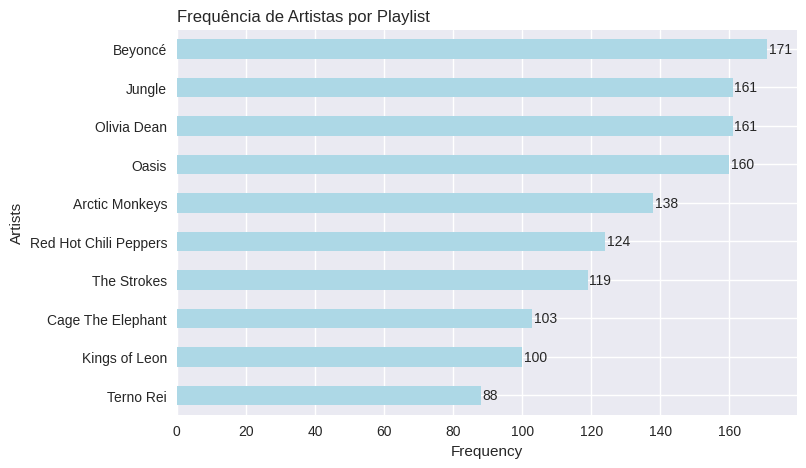

In [812]:
# Filtra os 10 artistas mais frequentes
artist_frequency = artist_frequency.head(10)

# Ordena de forma decrescente
artist_frequency = artist_frequency.loc[::-1]

# Exibe um gráfico de barras horizontal
artist_frequency.plot(kind='barh', color='lightblue', figsize=(8,5))
plt.title('Frequência de Artistas por Playlist', loc='left')
plt.xlabel('Frequency')
plt.ylabel('Artists')

# Adiciona a quantidade de músicas em cada barra horizontal
for i, v in enumerate(artist_frequency):
    plt.text(v + 0.5, i, str(v), va="center")

Os artistas mais adicionados são **Beyoncé** com 171 músicas presentes nas playlists, seguida de **Jungle** e **Olivia Dean** com 161 músicas cada. Podemos observar também que, com exceção de **Terno Rei**, os top 10 artistas não são brasileiros, indicando uma preferência por músicas internacionais.

#### Relação entre artistas mais populares e artistas mais adicionados às playlists.

In [813]:
# Mostra se algum dos 10 artistas mais frequentes é também algum dos 10 mais populares
artist_frequency.isin(artists_exploded_popularity.index).unique()

array([False])

Observei que, os top 10 artistas mais adicionados e os top 10 mais populares, ainda que presentes nas playlists, não são os mesmos. Isso demonstra que a popularidade do artista ou a forte presença dele na plataforma não é um critério de inclusão. As escolhas parecem refletir questões mais específicas e não apenas o destaque do artista.

#### Gêneros mais frequentes entre os artistas das playlists

Para observar os gêneros mais frequentes entre os artistas das playlists, será necessário unir os dois datasets, visto que um contém os nomes das playlists e o outro os gêneros.

In [814]:
# Une os datasets playlist_tracks_clean e genres_artists_clean
df_tracks_genres_merged = df_anonymous_clean.merge(genres_artists_clean, left_on='artist_names_exploded', right_on= 'artist_name', how= 'left')
df_tracks_genres_merged.head(3)

,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_year,artist_names_exploded,artist_name,genre
0,Playlist_01,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992,Rage Against The Machine,Rage Against The Machine,rap metal
1,Playlist_01,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992,Rage Against The Machine,Rage Against The Machine,rap rock
2,Playlist_01,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992,Rage Against The Machine,Rage Against The Machine,alternative metal


Agora, vou filtrar os gêneros mais presentes nas playlists.

In [815]:
popular_genres = df_tracks_genres_merged.groupby('genre')['artist_names_exploded'].count().sort_values(ascending=False)
popular_genres.head(10)

genre
mpb                 1336
nova mpb             969
samba                661
alternative rock     619
rock                 547
brazilian rock       504
bossa nova           501
indie                420
indie rock           406
garage rock          388
Name: artist_names_exploded, dtype: int64

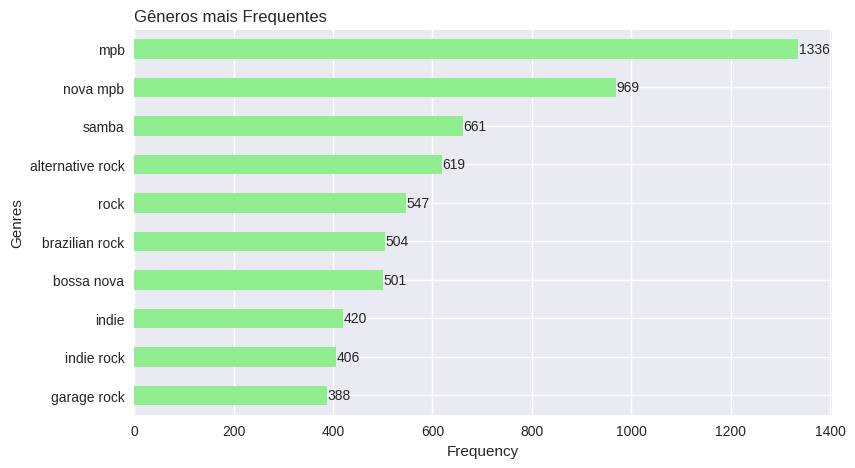

In [816]:
popular_genres = popular_genres.head(10)[::-1]
popular_genres = popular_genres[popular_genres > 10]
popular_genres.plot(kind="barh", color="lightgreen", figsize=(9,5))
plt.title('Gêneros mais Frequentes', loc='left')
plt.ylabel("Genres")
plt.xlabel("Frequency")

for i, v in enumerate(popular_genres):
    plt.text(v + 0.5, i, str(v), va="center")

Os gêneros mais frequentes são: **mpb** com 1038 faixas, seguido por **nova mpb** com 707, e **alternative rock** com 619 músicas presentes nas playlists.

Após obter os resultados dos gêneros mais frequentes, me chamou a atenção que, os artistas mais presentes nas playlists não cantam os gêneros mais populares, ou seja, os rankings não se alinham.

Para entender melhor essa diferença, vou investigar se esses artistas possuem gêneros registrados na coluna `genre`.

In [817]:
top_artists = artist_frequency.head(10).index

# Seleciona os top 10 artistas mais frequentes e os seus gêneros.
df_top_artists_genres = df_tracks_genres_merged[df_tracks_genres_merged['artist_names_exploded'].isin(top_artists)][['artist_names_exploded', 'genre']].drop_duplicates()

df_top_artists_genres


,artist_names_exploded,genre
116,Oasis,britpop
117,Oasis,madchester
167,Olivia Dean,pop soul
173,Beyoncé,NaN
272,Jungle,NaN
380,Red Hot Chili Peppers,funk rock
381,Red Hot Chili Peppers,alternative rock
382,Red Hot Chili Peppers,rock
854,The Strokes,garage rock
855,The Strokes,indie rock


Observei que, existem casos de artistas sem nenhum gênero registrado, como **Beyoncé**, **Jungle**, **Kings of Leon** e **Cage The Elephant**. Já artistas como **Olivia Dean**, **Oasis**, **Arctic Monkeys**, **The Strokes**, **Red Hot Chili Peppers** e **Terno Rei** possuem gêneros corretamente mapeados e aparecem na contagem de gêneros.

Irei investigar as possíveis causas dessa divergência.

In [818]:
df_tracks_genres_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18982 entries, 0 to 18981
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   playlist_name          18982 non-null  object
 1   track_id               18982 non-null  object
 2   track_name             18982 non-null  object
 3   artist_names           18982 non-null  object
 4   album_name             18982 non-null  object
 5   album_release_date     18982 non-null  object
 6   popularity             18982 non-null  int64 
 7   duration_ms            18982 non-null  int64 
 8   album_release_year     18982 non-null  Int64 
 9   artist_names_exploded  18982 non-null  object
 10  artist_name            15125 non-null  object
 11  genre                  15125 non-null  object
dtypes: Int64(1), int64(2), object(9)
memory usage: 1.8+ MB


Alguns gêneros ficaram nulos depois do merge.

Vou investigar quais artistas foram afetados.

In [819]:
# Mostra quais artistas possuem gênero nulo
df_tracks_genres_merged.loc[df_tracks_genres_merged['genre'].isna(), 'artist_names_exploded'].unique()[:20]

array(['NAPA', 'MARO', 'Balthazar', 'Lorde', 'Lola Young', 'Beyoncé',
       'Lizzo', 'Alabama Shakes', 'Disclosure', 'Corinne Bailey Rae',
       "Destiny's Child", 'Rihanna', 'Miley Cyrus', 'IZA', 'Mc Tha',
       'Charli xcx', 'Blue Ivy', 'SAINt JHN', 'Wizkid', 'Nectar Woode'],
      dtype=object)

Muitos artistas aparecem com gênero nulo após o merge. Uma causa provável é a existência de diferenças sutis no nome dos artistas. Essas divergências impedem o Pandas de realizar uma correspondência correta.

Para corrigir isso, vou padronizar os nomes dos artistas em ambos os datasets e fazer o merge novamente.

In [820]:
import unicodedata

def padroniza_texto(texto):
    """
    Limpa e padroniza o texto, removendo espaços, caracteres acentuados e letras maiúsculas.

    Parâmetros:
    texto: palavra ou frase a ser padronizada.
    Retorna:
    texto: palavra ou frase padronizada.
    """

    if not isinstance(texto, str):
        return texto

    texto = texto.strip().lower()
    texto = unicodedata.normalize('NFKD', texto)

    nomes_limpos = []
    for char in texto:
        if not unicodedata.combining(char):
            nomes_limpos.append(char)

    texto = "".join(nomes_limpos)

    return texto

In [821]:
# Cria uma coluna em ambos os datasets com o nome dos artistas padronizados
df_anonymous_clean['artists_name_clean'] = df_anonymous_clean['artist_names_exploded'].apply(padroniza_texto)
genres_artists_clean['artists_name_clean'] = genres_artists_clean['artist_name'].apply(padroniza_texto)

In [822]:
# Une os dois datasets
df_tracks_genres_merged_v2 = df_anonymous_clean.merge(genres_artists_clean, left_on='artists_name_clean', right_on= 'artists_name_clean', how= 'left')
df_tracks_genres_merged_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18983 entries, 0 to 18982
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   playlist_name          18983 non-null  object
 1   track_id               18983 non-null  object
 2   track_name             18983 non-null  object
 3   artist_names           18983 non-null  object
 4   album_name             18983 non-null  object
 5   album_release_date     18983 non-null  object
 6   popularity             18983 non-null  int64 
 7   duration_ms            18983 non-null  int64 
 8   album_release_year     18983 non-null  Int64 
 9   artist_names_exploded  18983 non-null  object
 10  artists_name_clean     18983 non-null  object
 11  artist_name            15127 non-null  object
 12  genre                  15127 non-null  object
dtypes: Int64(1), int64(2), object(10)
memory usage: 1.9+ MB


Mesmo após a padronização com a função não houve grande mudança. Outra hipótese é a desses artistas não existirem no dataset `genres_artists_clean`.

In [823]:
# Verifica quantos artistas do 'df_anonymous_clean' não aparecem em 'genres_artists_clean'
missing_genre = set(df_anonymous_clean['artists_name_clean']) - set(genres_artists_clean['artists_name_clean'])
len(missing_genre)

800

In [824]:
list(missing_genre)[:20]

['fergie',
 'rennan da penha',
 'sir chloe',
 'sam dew',
 'jeezy',
 'disclosure',
 'dj kaioken',
 'anna majidson',
 'george martin',
 'p!nk',
 'jup do bairro',
 'ibeyi',
 'halsey',
 'little joy',
 'art popular',
 'meta meta',
 'adriana dre',
 "lil' kim",
 'antonio carlos & jocafi',
 'busty and the bass']

Existem 800 artistas em `df_anonymous_clean` que não existem em `genres_artist_clean`. Vamos ver como isso impacta os artistas com maior presença na playlist.

In [825]:
top_artists_clean = [padroniza_texto(artistas) for artistas in top_artists]

In [826]:
# Seleciona os top 10 artistas mais frequentes e os seus gêneros.
df_top_artists_genres_v2 = df_tracks_genres_merged_v2[df_tracks_genres_merged_v2['artists_name_clean'].isin(top_artists_clean)][['artists_name_clean', 'genre']].drop_duplicates()

df_top_artists_genres_v2

,artists_name_clean,genre
116,oasis,britpop
117,oasis,madchester
167,olivia dean,pop soul
173,beyonce,NaN
272,jungle,NaN
380,red hot chili peppers,funk rock
381,red hot chili peppers,alternative rock
382,red hot chili peppers,rock
854,the strokes,garage rock
855,the strokes,indie rock


Após essa investigação, constatei que o problema não era divergência no nome, visto que isso foi tratado com a função `padroniza_texto`. A causa real ficou evidente ao comparar o número de artistas presentes em cada dataset, demonstrando que o dataset de gêneros possui uma cobertura significativamente menor.

Dessa forma, as métricas de gêneros mais populares ficam distorcidas, já que parte dos artistas mais frequentes não estão presentes no dataset de gêneros, o que explica a divergência entre os rankings de artistas e gêneros.

Para uma análise mais precisa, seria necessário completar esses dados faltantes.

#### Duração média das músicas por playlist

In [827]:
tracks_avg_duration = df_anonymous_clean.groupby('playlist_name')['duration_ms'].mean().sort_values()
tracks_avg_duration.head(10)


playlist_name
Playlist_59    191036.722772
Playlist_53    193894.018987
Playlist_10    201972.437500
Playlist_16    208310.306818
Playlist_17    208742.790698
Playlist_46    209344.448598
Playlist_71    210317.117284
Playlist_06    210737.893617
Playlist_74    211662.840399
Playlist_45    211663.224242
Name: duration_ms, dtype: float64

Irei transformar a duração em minutos para tornar a análise mais clara.

In [828]:
# Faz uma cópia do dataset para não alterar sem necessidade
df_tracks_avg_duration_min = df_anonymous_clean.copy()

# Adiciona uma coluna com a duração em minutos
df_tracks_avg_duration_min['duration_min'] = df_tracks_avg_duration_min['duration_ms'] // 60000

# Seleciona a duração média das músicas em minutos das playlists
tracks_avg_duration_min = df_tracks_avg_duration_min.groupby('playlist_name')['duration_min'].mean().sort_values()

tracks_avg_duration_min.head(10)

playlist_name
Playlist_53    2.670886
Playlist_59    2.693069
Playlist_10    2.812500
Playlist_16    2.954545
Playlist_05    2.961538
Playlist_60    2.966102
Playlist_17    2.976744
Playlist_46    2.981308
Playlist_71    3.000000
Playlist_32    3.000000
Name: duration_min, dtype: float64

Para uma análise mais rápida irei verificar quais playlists possuem a duração média mínima e máxima.

In [829]:
# Seleciona a playlist que possui e menor e maior média de duração
duration_min_max = tracks_avg_duration_min[[tracks_avg_duration_min.idxmin(), tracks_avg_duration_min.idxmax()]]
duration_min_max

playlist_name
Playlist_53    2.670886
Playlist_02    4.545455
Name: duration_min, dtype: float64

Text(0, 0.5, 'Duration (min)')

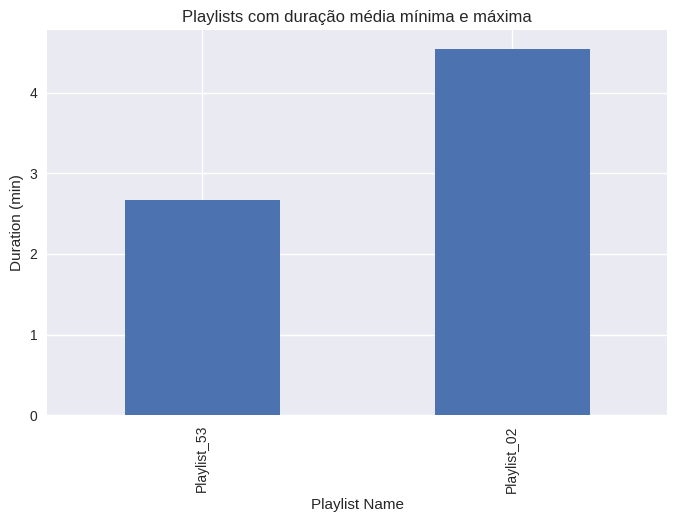

In [830]:
duration_min_max.plot(kind="bar", figsize=(8,5))
plt.title("Playlists com duração média mínima e máxima")
plt.xlabel("Playlist Name")
plt.ylabel("Duration (min)")

A playlist que tem a maior média é **Playlist_02** com 4.54 minutos de duração. A que tem a menor média é **Playlist_53** com 2.67 minutos.

#### Relação entre duração média e ano de lançamento das músicas

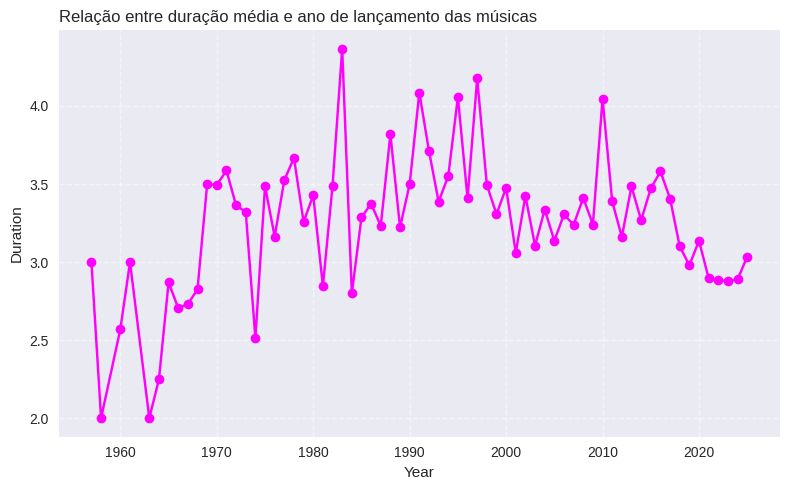

In [831]:
tracks_avg_year = df_tracks_avg_duration_min.groupby('album_release_year')['duration_min'].mean().sort_index()
tracks_avg_year.plot(kind='line', marker="o", color='magenta', figsize=(8,5))

plt.title('Relação entre duração média e ano de lançamento das músicas', loc='left')
plt.xlabel("Year")
plt.ylabel("Duration")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

As músicas não apresentam um padrão de crescimento contínuo na duração ao longo das décadas, mas é possível observar alguns pontos de aumento em décadas específicas. De forma geral, a partir dos anos 70 há uma tendência de músicas um pouco mais longas, embora com variações ao longo do tempo.

#### Diversidade de gêneros nas playlists

In [832]:
count_genre = df_tracks_genres_merged_v2.groupby('playlist_name')['genre'].nunique().sort_values(ascending=False)
count_genre.head(10)

playlist_name
Playlist_43    91
Playlist_39    84
Playlist_48    70
Playlist_65    69
Playlist_79    64
Playlist_76    58
Playlist_40    55
Playlist_75    54
Playlist_55    50
Playlist_15    49
Name: genre, dtype: int64

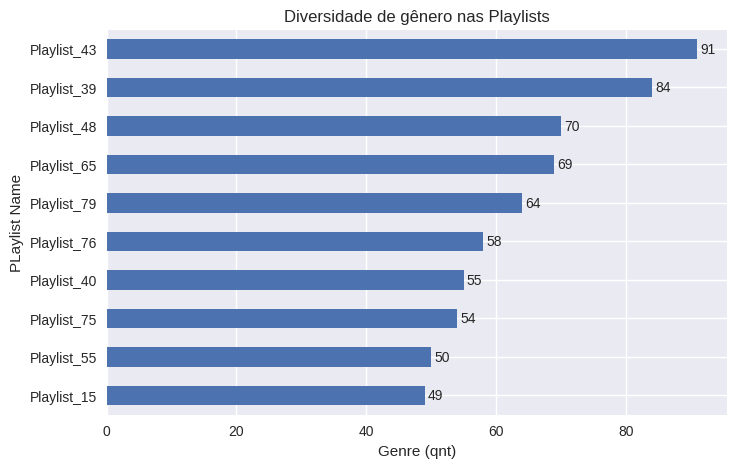

In [833]:
# Exibe os valores em ordem decrescente
count_genre = count_genre.head(10)[::-1]

# Exibe o gráfico
count_genre.plot(kind="barh", figsize=(8,5))
plt.title('Diversidade de gênero nas Playlists')
plt.xlabel('Genre (qnt)')
plt.ylabel('PLaylist Name')

# Acrescenta o valor correspondente em cada barra
for i, v in enumerate(count_genre):
    plt.text(v + 0.5, i, str(v), va="center")


As playlists mais diversas são: **Playlist_43** que apresenta o total de 81 gêneros diferentes, seguida de **Playlist_39** com 79 gêneros e **Playlist_48** com 62. Essa playlists possuem músicas variadas, o que indica uma curadoria pouco restrita a um único estilo.

Por outro lado, playlists mais centradas em um tema ou humor específico tendem a aparecer mais abaixo no ranking, pois refletem um conjunto menor de gêneros distintos.

Essa análise ajuda a entender a intenção da usuária ao montar cada playlist e evidencia o nível de diversidade musical oresente em cada uma.

Vale destacar que, devido à ausência de alguns artistas no dataset de gêneros, esses números podem estar parcialmente subestimados e a diversidade real pode ser ainda maior.

### Conclusão

O objetivo desse notebook foi traçar um perfil musical e gostos pessoais da usuária. Por isso, busquei entender quais fatores influenciaram as escolhas das faixas e o grau de atividade da usuária na curadoria das playlists.

Durante esse processo foram realizadas algumas etapas de limpeza e padronização como, formatação de datas, transformação de dados largos para longos e união de datasets, para garantir a consistência dos dados.

A análise revelou alguns pontos importantes. Observou-se que, a usuária possui um comportamento bem ativo na plataforma, sugerindo não apensas uso frequente, mas também um envolvimento curatorial, visto que as suas playlists, além da quantidade, possuem um volume alto de músicas. Observou-se também que a usuária tem preferência por músicas contemporâneas e internacionais, com ano de lançamento entre 2000 e 2010. Além disso, os dados indicam que as escolhas dependem de gostos pessoais e não da popularidade do artista.

Apesar dos resultados, é importante destacar a limitação na identificação precisa dos gêneros mais populares, já que muitos dos artistas mais presentes nas playlists não aparecem no dataset de gêneros.

De forma geral, a análise permitiu construir o retrato do perfil musical da usuária e abriu caminhos para explorações futuras, como a investigação mais profunda dos gêneros, caso dados mais completos estejam disponíveis.